# Working with NWB files in Python 

Neurodata Without Borders files can be easily read into Python or MATLAB. Here, we'll use the PyNWB package to import a NWB dataset into our Jupyter Notebook. If you'd like more information, or would like to see how to import data in MATLAB, see the [NWB tutorials](https://www.nwb.org/how-to-use/).

To get started, we'll import the `NWBHDF5IO` module from the `PyNWB` package. This module contains the tools to map our NWB file into a more general format, [HDF5](https://nwb-storage.readthedocs.io/en/latest/storage_hdf5.html). If you do not already have pynwb installed in your environment, this cell will also help you do so.

In [3]:
try:
    from pynwb import NWBHDF5IO
    print('NWBHDF5IO imported.')
except ImportError as e:
    !pip install pynwb

NWBHDF5IO imported.


## Reading our NWB file

To access the data in our nwb file we must read the file. This is done in two steps:
1. Assign our file as an `NWBHDF5IO` object
2. Read our file 

The first step is done using the `NWBHDF5IO` class to create our `NWBHDF5IO` object and map our file to HDF5 format. Once we have done this, we can use the `read()` method to return our nwb file. For more information on how to read NWB files, please visit the *Reading data from an NWB file* section from the <a href = 'https://pynwb.readthedocs.io/en/latest/tutorials/general/file.html'> NWB Basics Tutorial</a>. For more information on the `NWBHDF5IO` class, please visit the <a href = 'https://pynwb.readthedocs.io/en/latest/pynwb.html#pynwb.NWBHDF5IO'> original documentation</a>.

Below, we'll create an NWB object for one session of a electrophysiology experiment, retrieved via [DANDI](https://gui.dandiarchive.org/#/dandiset/000017).

In [36]:
io = NWBHDF5IO('00006/sub-anm369962/sub-anm369962_ses-20170309.nwb', 'r')
nwb_file = io.read()
print(type(nwb_file))

UnsupportedOperation: Unable to open file 00006/sub-anm369962/sub-anm369962_ses-20170309.nwb in 'r' mode. File does not exist.

We can now use this `nwb_file` that we've created to extract metadata about the experiment. Each NWB file will have information on where the experiment was conducted, what lab conducted the experiment, as well as a description of the experiment. This information can be accessed using `institution`, `lab`, and `description`, attributes on our `nwb_file`, respectively. 

In [11]:
# Get Meta-Data from NWB file 
print('The experiment within this NWB file was conducted at {} in the lab of {}. \
    The experiment is detailed as follows: {}'. \
    format(nwb_file.institution, nwb_file.lab, \
    nwb_file.experiment_description))

The experiment within this NWB file was conducted at University College London in the lab of The Carandini and Harris Lab.     The experiment is detailed as follows: Large-scale Neuropixels recordings across brain regions of mice during a head-fixed visual discrimination task. 


## NWB File Hierarchy: Groups, Datasets, and Attributes

The NWB file is composed of various Groups, Datasets, and Attributes. The data and corresponding meta-data are encapsulated within these Groups. The `fields` attribute returns a dictionary containing the metadata of the Groups of our nwb file. The dictionary `keys` are the various Groups within the file which we will use to access the information within our dataset.

In [12]:
# Get the Groups for the nwb file 
nwb_fields = nwb_file.fields
print(nwb_fields.keys())

dict_keys(['acquisition', 'analysis', 'scratch', 'stimulus', 'stimulus_template', 'processing', 'devices', 'electrode_groups', 'imaging_planes', 'icephys_electrodes', 'ogen_sites', 'intervals', 'lab_meta_data', 'session_description', 'identifier', 'session_start_time', 'timestamps_reference_time', 'file_create_date', 'keywords', 'epoch_tags', 'electrodes', 'subject', 'trials', 'units', 'experiment_description', 'lab', 'institution', 'experimenter', 'related_publications'])


We can access metadata from each group in our `nwb_file` with the following syntax: `nwb_file.group`, just as we would normally access an attribute. 

The `acquisition` group contains datasets of acquisition data. We can look at the look at the `description` field in the metadata to understand what each dataset in the group contains. 

In [15]:
# example showing how to return meta data from groups in nwb file 
# 'acquisition' is the first group in our file 
nwb_file.acquisition

{'lickPiezo': lickPiezo pynwb.base.TimeSeries at 0x140493853076280
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (1314000,), type "<f8">
   description: Voltage values from a thin-film piezo connected to the lick spout, so that values are proportional to deflection of the spout and licks can be detected as peaks of the signal.
   rate: 0.002000031887945625
   resolution: -1.0
   starting_time: 33.65250410481991
   starting_time_unit: seconds
   unit: V,
 'wheel_position': wheel_position pynwb.base.TimeSeries at 0x140493853076728
 Fields:
   comments: The wheel has radius 31 mm and 1440 ticks per revolution, so multiply by 2*pi*r/tpr=0.135 to convert to millimeters. Positive velocity (increasing numbers) correspond to clockwise turns (if looking at the wheel from behind the mouse), i.e. turns that are in the correct direction for stimuli presented to the left. Likewise negative velocity corresponds to right choices.
   conversion: 0.135
   dat

In this file, the acquisition group contains two different dataets, `lickPiezo` and `wheel_position`. To access the actual data array of these datasets we must first subset our dataset of interest from the group. We can then use `data[:]` to return our actual data array. 

In [7]:
# select our dataset of interest 
dataset = 'lickPiezo'
lickPiezo_ds = nwb_file.acquisition[dataset]

# return first 20 values in data array 
lickPiezo_data_array = lickPiezo_ds.data[:20]

print(lickPiezo_data_array)

[3.18436567 3.4575181  3.63766762 3.71285813 3.68129979 3.55107522
 3.33830297 3.06425065 2.75209663 2.42396281 2.09870512 1.7906713
 1.50938029 1.25993802 1.04387904 0.85846741 0.69874522 0.56921781
 0.46425845 0.37914098]


The `processing` group in our `nwb_file` contains all of our processed data for scientific analysis. Within the processing group there are mulitple subgroups that belong to the `behavior` module. `BehavioralEpochs`, `BehavioralEvents`, `BehavioralEvents`, and `PupilTracking` are seperate groups encapsulated within `behavior` and contain their own datasets. 

In [8]:
# return meta data for prcessing group
nwb_file.processing

{'behavior': behavior pynwb.base.ProcessingModule at 0x140437403596496
 Fields:
   data_interfaces: {
     BehavioralEpochs <class 'pynwb.behavior.BehavioralEpochs'>,
     BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>,
     BehavioralTimeSeries <class 'pynwb.behavior.BehavioralTimeSeries'>,
     PupilTracking <class 'pynwb.behavior.PupilTracking'>
   }
   description: behavior module}

If we subset `PupilTracking` from `behavior` we can see that it contains two datasets. We can do as we did before and subset our dataset of interst and return the actual data array by executing `data[:]`.

In [9]:
# assign behavior group to variable 
behavior = nwb_file.processing['behavior']

# subset PupilTracking group from behavior group 
pupil_tracking = behavior['PupilTracking']
print(pupil_tracking)

PupilTracking pynwb.behavior.PupilTracking at 0x140437405881424
Fields:
  time_series: {
    eye_area <class 'pynwb.base.TimeSeries'>,
    eye_xy_positions <class 'pynwb.base.TimeSeries'>
  }



In [10]:
# subset the eye_xy_positions dataset
eye_xy_positions = pupil_tracking['eye_xy_positions']
print(eye_xy_positions)

# return firsy 10 entires in actual data array
print('\n Eye (x,y) positions:')
print(eye_xy_positions.data[:10])

eye_xy_positions pynwb.base.TimeSeries at 0x140437405881872
Fields:
  comments: The 2D position of the center of the pupil in the video frame. This is not registered to degrees visual angle, but could be used to detect saccades or other changes in eye position.
  conversion: 1.0
  data: <HDF5 dataset "data": shape (267759, 2), type "<f8">
  description: Features extracted from the video of the right eye.
  interval: 1
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (267759,), type "<f8">
  timestamps_unit: seconds
  unit: arb. unit


 Eye (x,y) positions:
[[1.56599408 0.06802196]
 [1.58213078 0.05515582]
 [1.5796662  0.14542675]
 [1.57286532 0.13382707]
 [1.57185696 0.01200337]
 [1.58985626 0.08226199]
 [1.62204413 0.26782588]
 [1.59213104 0.13432399]
 [1.6127692  0.33010592]
 [1.63706748 0.28426869]]


The `intervals` Group contains datasets from trials of our experiment, sub-experiments that were conducted, and/or epochs. For the example below, we will look into the `trials` dataset. You can return the `trials` data as a dataframe by using the `to_dataframe` method.

In [11]:
# Select the group of interest 
intervals = nwb_file.intervals

# Subset the dataset from the group and assign it as a dataframe
interval_trials_df = intervals['trials'].to_dataframe()
interval_trials_df.head()

,start_time,stop_time,included,go_cue,visual_stimulus_time,visual_stimulus_left_contrast,visual_stimulus_right_contrast,response_time,response_choice,feedback_time,feedback_type,rep_num
id,,,,,,,,,,,,
0,62.900284,67.423484,True,66.296625,65.269408,1.0,0.0,66.419612,1.0,66.456227,1,1.0
1,68.420838,73.604476,True,72.077117,71.202703,0.0,0.5,72.602206,-1.0,72.640326,1,1.0
2,74.602902,78.006757,True,76.877593,76.052380,1.0,0.5,77.001671,1.0,77.038396,1,1.0
3,79.003653,84.506778,True,81.996875,81.235263,0.0,0.0,83.502065,0.0,83.531699,1,1.0
4,85.501795,88.621336,True,87.462962,86.800952,0.5,1.0,87.617727,1.0,87.628565,-1,1.0


The `description` attribute provides a short description on each column of the dataframe. 

In [71]:
print(intervals['trials']['response_choice'].description)

Enumerated type. The response registered at the end of the trial, which determines the feedback according to the contrast condition. Note that in a small percentage of cases (~4%, see manuscript Methods) the initial wheel turn was in the opposite direction. -1 for Right choice (i.e. correct when stimuli are on the right); +1 for left choice; 0 for Nogo choice.


For more information on all the different Groups and hierarchal structure of an NWB file, please visit the <a href = 'https://nwb-schema.readthedocs.io/en/latest/format.html#nwb-n-file'> NWB:N file section</a> of the NWB Format documentation. For a list of all the attributes and methods for a `pynwb.file.NWBfile` obeject, please visit the <a href = 'https://pynwb.readthedocs.io/en/stable/pynwb.file.html'> module documentation</a>.

## Possible Analyses 

A raster plot (this needs to be fixed)

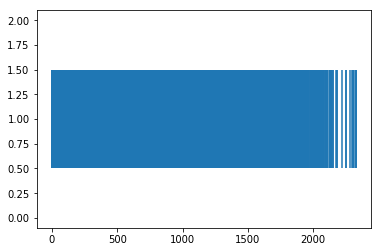

In [37]:
import matplotlib.pyplot as plt
import numpy as np

for unit in range(len(nwb_file.units['spike_times'])):
    spike_times = nwb_file.units['spike_times'][unit][:100]
    y_unit = np.ones(100)*unit
    plt.eventplot(spike_times)

plt.show()

In [14]:
# test cell 
nwb_file.session_description 

'Neuropixels recording during visual discrimination in awake mice.'

In [55]:
# test cell
stimulus_dict = nwb_file.stimulus 
for key in stimulus_dict:
    print(key +':')
    print(stimulus_dict[key].description)
    print('\n')

passive_beeps:
Auditory tones of the same frequency as the auditory tone cue in the task


passive_click_times:
Opening of the reward valve, but with a clamp in place such that no water flows. Therefore the auditory sound of the valve is heard, but no water reward is obtained.


passive_left_contrast:
Gratings of the same size, spatial freq, position, etc as during the discrimination task.


passive_right_contrast:
Gratings of the same size, spatial freq, position, etc as during the discrimination task.


passive_white_noise:
The sound that accompanies an incorrect response during the discrimination task.


receptive_field_mapping_sparse_noise:
White squares shown on the screen with randomized positions and timing - see manuscript Methods.




In [68]:
electrode_groups = nwb_file.electrode_groups

for key in electrode_groups:
    print(key + ':')
    print(electrode_groups[key].description)
    print(electrode_groups[key].location)
    print('\n')

Probe1:
Neuropixels Phase3A opt3



Probe2:
Neuropixels Phase3A opt3





In [56]:
# electrode positions 
electrodes = nwb_file.electrodes
electrodes.to_dataframe().head()

,x,y,z,imp,location,filtering,group,group_name,site_id,site_position,ccf_ap,ccf_dv,ccf_lr,entry_point_rl,entry_point_ap,vertical_angle,horizontal_angle,axial_angle,distance_advanced
id,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,LS,none,Probe1 pynwb.ecephys.ElectrodeGroup at 0x14043...,Probe1,0,"[43.0, 20.0]",4432.3,4699.7,5002.3,-640,1500,81.400131,172.959797,0,3800
1,NaN,NaN,NaN,NaN,LS,none,Probe1 pynwb.ecephys.ElectrodeGroup at 0x14043...,Probe1,1,"[11.0, 20.0]",4428.4,4699.7,4970.6,-640,1500,81.400131,172.959797,0,3800
2,NaN,NaN,NaN,NaN,LS,none,Probe1 pynwb.ecephys.ElectrodeGroup at 0x14043...,Probe1,2,"[59.0, 40.0]",4431.3,4680.0,5018.6,-640,1500,81.400131,172.959797,0,3800
3,NaN,NaN,NaN,NaN,LS,none,Probe1 pynwb.ecephys.ElectrodeGroup at 0x14043...,Probe1,3,"[27.0, 40.0]",4427.3,4680.0,4986.8,-640,1500,81.400131,172.959797,0,3800
4,NaN,NaN,NaN,NaN,LS,none,Probe1 pynwb.ecephys.ElectrodeGroup at 0x14043...,Probe1,4,"[43.0, 60.0]",4426.3,4660.2,5003.1,-640,1500,81.400131,172.959797,0,3800


In [54]:
# description of each column in electrodes 
for col in electrodes.to_dataframe():
    print(col + ':')
    print(electrodes[col].description)
    print('\n')

x:
the x coordinate of the channel location


y:
the y coordinate of the channel location


z:
the z coordinate of the channel location


imp:
the impedance of the channel


location:
the location of channel within the subject e.g. brain region


filtering:
description of hardware filtering


group:
a reference to the ElectrodeGroup this electrode is a part of


group_name:
the name of the ElectrodeGroup this electrode is a part of


site_id:
The site number, in within-probe numbering, of the channel (in practice for this dataset this always starts at zero and counts up to 383 on each probe so is equivalent to the channel number - but if switches had been used, the site number could have been different than the channel number).


site_position:
The x- and y-position of the site relative to the face of the probe (where the first column is across the face of the probe laterally and the second is the position along the length of the probe; the sites nearest the tip have second column=0).


In [60]:
# all electrode locations 
electrode_df = electrodes.to_dataframe()
print(electrode_df['location'].unique())

['LS' 'root' 'ACA' 'MOs' 'CA3' 'DG' 'SUB' 'VISp']


In [69]:
stimulus_dict[]

{'passive_beeps': passive_beeps pynwb.base.TimeSeries at 0x140437403596752
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (25,), type "|b1">
   description: Auditory tones of the same frequency as the auditory tone cue in the task
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (25,), type "<f8">
   timestamps_unit: seconds
   unit: n/a,
 'passive_click_times': passive_click_times pynwb.base.TimeSeries at 0x140437405881680
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (25,), type "|b1">
   description: Opening of the reward valve, but with a clamp in place such that no water flows. Therefore the auditory sound of the valve is heard, but no water reward is obtained.
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (25,), type "<f8">
   timestamps_unit: seconds
   unit: n/a,
 'passive_left_contrast': passive_left_contrast pynwb.base

In [74]:
# test cell
for col in intervals['trials'].to_dataframe():
    print(col +':')
    print(intervals['trials'][col].description)
    print('\n')

start_time:
Start time of epoch, in seconds


stop_time:
Stop time of epoch, in seconds


included:
Importantly, while this variable gives inclusion criteria according to the definition of disengagement (see manuscript Methods), it does not give inclusion criteria based on the time of response, as used for most analyses in the paper.


go_cue:
The 'goCue' is referred to as the 'auditory tone cue' in the manuscript.


visual_stimulus_time:
Times are relative to the same time base as every other time in the dataset, not to the start of the trial.


visual_stimulus_left_contrast:
Proportion contrast. A value of 0.5 means 50% contrast. 0 is a blank screen: no change to any pixel values on that side (completely undetectable).


visual_stimulus_right_contrast:
Proportion contrast. A value of 0.5 means 50% contrast. 0 is a blank screen: no change to any pixel values on that side (completely undetectable).


response_time:
Times are relative to the same time base as every other time in the dat